Задание¶
Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

Оцените ошибки моделей из п.1 .

Сделайте вывод о том, как изменилась ошибка модели по значениям h.

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os


In [2]:
my_PJME_MW_path = 'C:/Users/Anatoly/Desktop/Time_rows/lesson2/my_PJME_MW.csv'

In [4]:
data = pd.read_csv(my_PJME_MW_path, index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [5]:
columns = data.columns.tolist()

Быстро проверим на наличие нулей в датафрейме. 

In [6]:
for col in columns: 
    print(data[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0


C:\Users\Anatoly\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


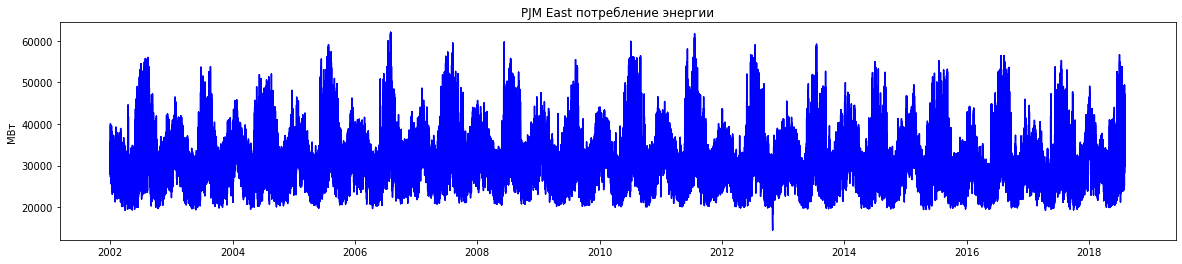

In [7]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

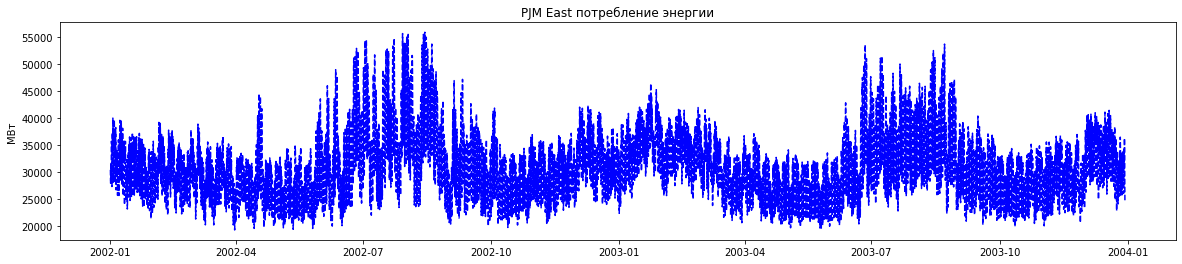

In [8]:
date_time =data['PJME_MW']
date_time.index = pd.date_range(data.index[0], periods=data.index.shape[0], freq="H")
plt.figure(figsize =(20,4))
plt.plot( date_time.index[:24*7*104], date_time.values[:24*7*104], '--b' )

plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [9]:
d_data = data['PJME_MW'].values[1:]-data['PJME_MW'].values[:-1]

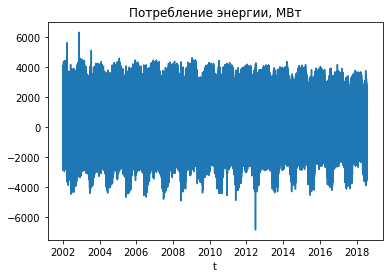

In [10]:
plt.plot(data.iloc[:-1].index,d_data)
plt.xlabel('t')
plt.title('Потребление энергии, МВт')
plt.show()

In [11]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [12]:
DF_data_d = sm.tsa.stattools.adfuller(d_data,regression='ctt')
print('коэффициент ADF для 1-й разности потребления энергии: ', DF_data_d[1])

коэффициент ADF для 1-й разности потребления энергии:  0.0


Сделаем ресэмпл по дням. 

In [14]:
d_data=data.resample('D').mean()

In [15]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

Text(0.5, 1.0, 'PJME_MW')

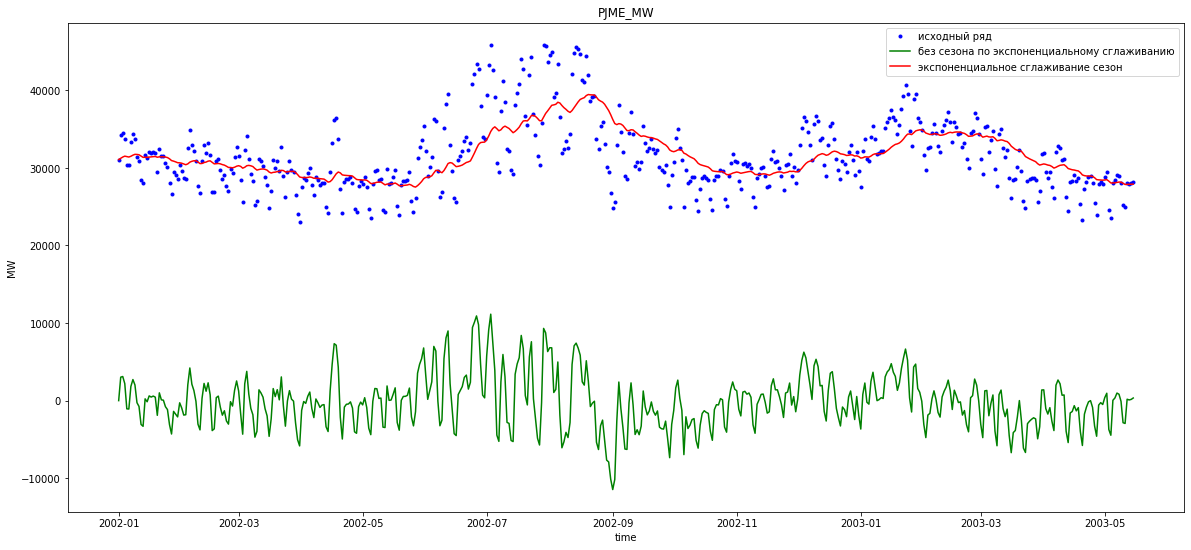

In [16]:
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)
plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], '.b',label='исходный ряд')

plt.plot(d_data.index[:500],d_data['PJME_MW'].values[:500] - data_exp_1[:500] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:500],data_exp_1[:500] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

In [17]:
data_seson_free = pd.DataFrame(data = (np.array(d_data['PJME_MW']).reshape((d_data['PJME_MW'].shape[0],1)) -data_exp_1))
DF_ = sm.tsa.stattools.adfuller( data_seson_free.iloc[:,0] , regression = 'ctt')
DF_

(-8.36536213855966,
 4.282974615450982e-11,
 34,
 6024,
 {'1%': -4.373054660566805,
  '5%': -3.833370706612336,
  '10%': -3.55386764946938},
 107622.59914749119)

Результат удаления явно сезонной составляющей для потребления энергии стационарный ряд. Перейдем к формированю пространства признаков, которое приблизит нас к цели - предсказанию следующего значения ряда.

In [18]:
temp_energy = d_data['PJME_MW'].values #ear
temp_s = pd.DataFrame(data = d_data[['PJME_MW']]) #es
temp_s.shape

(6059, 1)

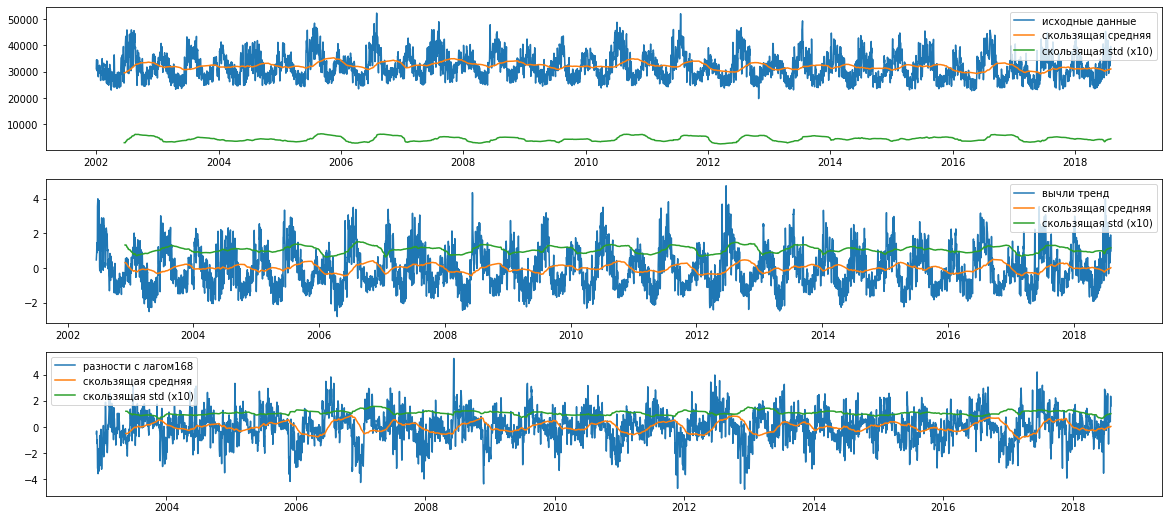

In [19]:
train = temp_s.iloc[:-10, :]
test = temp_s.iloc[-10:, :]


N2 = 24*7

temp_s['z_data'] = (temp_s['PJME_MW'] - temp_s['PJME_MW'].rolling(window=N2).mean()) / temp_s['PJME_MW'].rolling(window=N2).std()
temp_s['zp_data'] = temp_s['z_data'] - temp_s['z_data'].shift(N2)

def plot_rolling(e_s):
    fig, ax = plt.subplots(3,figsize=(20, 9))
    ax[0].plot(temp_s.index, temp_s['PJME_MW'], label='исходные данные')
    ax[0].plot(temp_s['PJME_MW'].rolling(window=N2).mean(), label="скользящая средняя");
    ax[0].plot(temp_s['PJME_MW'].rolling(window=N2).std(), label="скользящая std (x10)");
    ax[0].legend()

    ax[1].plot(temp_s.index,e_s.z_data, label="вычли тренд")
    ax[1].plot(temp_s.z_data.rolling(window=N2).mean(), label="скользящая средняя");
    ax[1].plot(temp_s.z_data.rolling(window=N2).std(), label="скользящая std (x10)");
    ax[1].legend()

    ax[2].plot(temp_s.index, e_s.zp_data, label="разности с лагом" +str(N2))
    ax[2].plot(temp_s.zp_data.rolling(window=N2).mean(), label="скользящая средняя");
    ax[2].plot(temp_s.zp_data.rolling(window=N2).std(), label="скользящая std (x10)");
    ax[2].legend()

    #plt.tight_layout()
   #
    plt.show()
plot_rolling(temp_s)

In [20]:
data_exp_1 = pd.DataFrame(data = data_exp_1, index = temp_s.index)
#без тренда 
PJME_data_trend_free = (temp_s['PJME_MW'] - data_exp_1.iloc[:,0])
PJME_data_trend_free.head()
DF_PJME = sm.tsa.stattools.adfuller(PJME_data_trend_free , regression = 'ctt')
DF_PJME

(-8.581319663386449,
 1.2647533240715635e-11,
 33,
 6025,
 {'1%': -4.37305434095676,
  '5%': -3.8333705437821584,
  '10%': -3.5538675485903948},
 107068.01402251713)

In [21]:
df= pd.DataFrame(data_exp_1)
df.head()
 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0]-df.iloc[1:,0]


df.head()

C:\Users\Anatoly\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.0
2002-01-02,31239.779257,31080.739130,0.000000,0.000000,31082.329532,31085.510334,31093.462341,0.0
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000,31085.540077,31095.046546,31118.256077,0.0
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130,31089.874554,31107.764782,31150.314611,0.0
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257,31093.608754,31118.430677,31175.353012,0.0


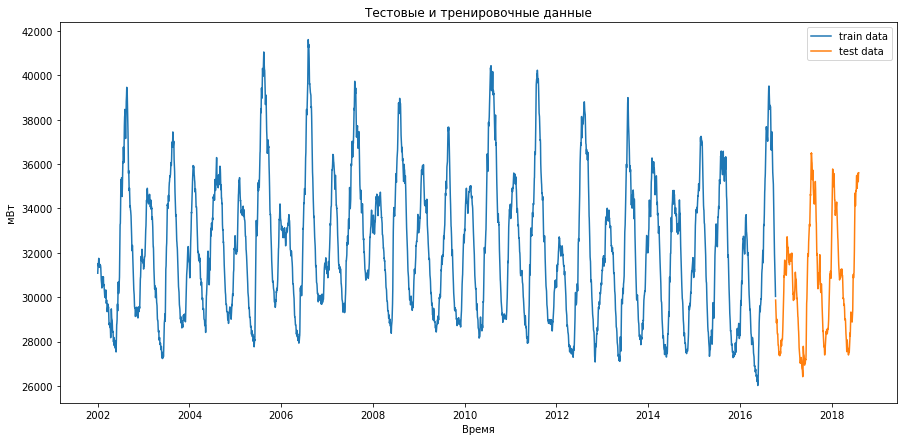

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_b, test_b = split_data_b( df, '10-10-2016')

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel(' мВт ')
plt.plot(train_b.index.get_level_values('Date'),train_b[df.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Date'),test_b[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

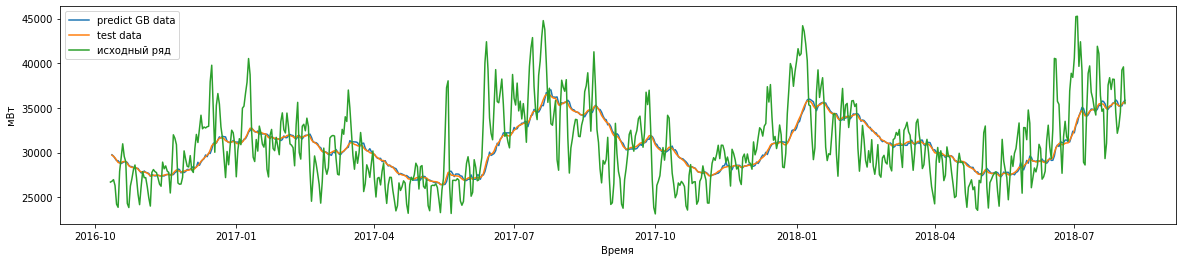

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel(' мВт ')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')
plt.plot(temp_s.loc['2016-10-11':].index, temp_s.loc['2016-10-11':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

In [24]:
print('ошибка градиентного бустинга :  ', er_g, '%')

ошибка градиентного бустинга :   0.4758222301856593 %


Ожидаемо низкое значение ошибки при заданной глубине и небольшом интервале прогнозирования (h=1) 

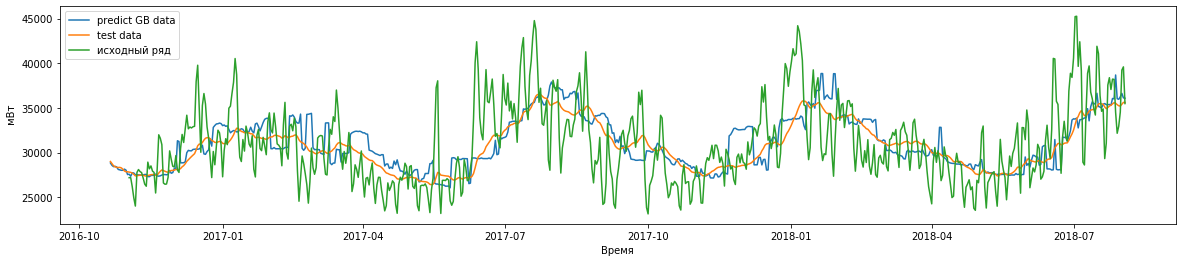

In [26]:
h=10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel(' мВт')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(temp_s.loc['2016-11-02':].index, temp_s.loc['2016-11-02':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

In [27]:
print('ошибка градиентного бустинга :  ', er_g, '%')

ошибка градиентного бустинга :   3.4728655214249504 %


При увеличении h видим как увеличивается ошибка предсказания. Это неудивительно, на более длительном периоде времени делать предсказания сложнее. 

По остальным вопросам: 

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

На длине года по часовым таймфреймам: нестационарный, с трендом в межсезонье, с циклом. 

б) Количество денег, которые тратят покупатели в интернет магазине.

Не понятен контекст 
На длине года по часовым таймфреймам: нестационарный, с трендом в межсезонье или накануне праздников, с циклом: в начале года меньше покупок, перед новым годом - пик.

в) Вес растущего котенка.

На длине года по часовым таймфреймам: нестационарный, с трендом (когда будет - хорошая задача для предсказания), с циклом: впосле рождения совсем маленький вес, потом набор, далее плато, снова набор.

г) Прирост объема деревьев в лесу от времени

А если будут делать вырубку и прирост будет компенсировать ее? Или наоборот, вырубка будет выше прироста? А ведь от этого зависит и стационарность и тренд и сезонность... 